In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

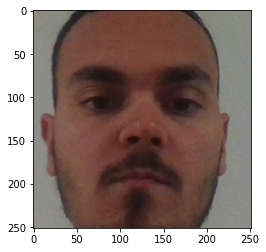

In [5]:
# head tracking with camshift
cap = cv.VideoCapture(0)

face_cascade = cv.CascadeClassifier('haarcascade_face.xml')

while True:
    _, frame = cap.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

    faces = face_cascade.detectMultiScale(gray)
    
    if len(faces) == 0:
        continue
    else:
        for (x, y, w, h) in faces:
            cv.rectangle(rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)
            face_rect = (x, y, w, h)
            face_roi = rgb[y+2:y+h-2, x+2:x+w-2]
        break

# camshift
lower_hsv = np.array([0, 35, 30], dtype='uint8')
upper_hsv = np.array([50, 255, 100], dtype='uint8')
hsv_roi = cv.cvtColor(face_roi, cv.COLOR_RGB2HSV)

mask = cv.inRange(hsv_roi, lower_hsv, upper_hsv)
roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)
plt.imshow(face_roi)

while True:
    _, frame = cap.read()

    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    ret, face_rect = cv.CamShift(dst, face_rect, term_crit)

    pts = cv.boxPoints(ret)
    pts = np.int0(pts)
    img2 = cv.polylines(frame, [pts], True, 255, 2)
    cv.imshow('img2', img2)
    cv.imshow('mask', mask)

    if cv.waitKey(1) == ord('q'):
        break

cv.destroyAllWindows()
cap.release()